<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/%5BPytorch%5DDogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import numpy as np
import PIL

### CUDA

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Download and unzip the data

In [3]:
import os
import shutil
import zipfile

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip = zipfile.ZipFile('/content/drive/MyDrive/DeepLearning/대구AI허브/dogs-vs-cats.zip', 'r')
zip.extractall('dogs-vs-cats')
zip.close()

In [6]:
filenames = os.listdir('dogs-vs-cats')   
filenames[0]

'cat.4019.jpg'

In [7]:
os.makedirs('dogs-vs-cats/train/dogs', exist_ok=True)
os.makedirs('dogs-vs-cats/train/cats', exist_ok=True)
os.makedirs('dogs-vs-cats/test/dogs', exist_ok=True)
os.makedirs('dogs-vs-cats/test/cats', exist_ok=True)

### Split dog and cat by file name

In [8]:
dogs = []
cats = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        dogs.append(filename)
    else:
        cats.append(filename)

In [ ]:
print(len(dogs), dogs)
print(len(cats), cats)

In [10]:
data_size = min(len(dogs), len(cats))
train_size_per_category = int(data_size * 0.8)
test_size_per_category = data_size - train_size_per_category
print(data_size, train_size_per_category, test_size_per_category)

12500 10000 2500


In [11]:
dogs = dogs[:data_size]
cats = cats[:data_size]
train_dogs, test_dogs = torch.utils.data.random_split(dogs, [train_size_per_category, test_size_per_category])
train_cats, test_cats = torch.utils.data.random_split(cats, [train_size_per_category, test_size_per_category])
print(len(train_dogs), len(train_cats), len(test_dogs), len(test_cats))
for i in range(train_size_per_category):
    shutil.move(os.path.join('dogs-vs-cats/', train_dogs[i]), 'dogs-vs-cats/train/dogs')
    shutil.move(os.path.join('dogs-vs-cats/', train_cats[i]), 'dogs-vs-cats/train/cats')
for i in range(test_size_per_category):
    shutil.move(os.path.join('dogs-vs-cats/', test_dogs[i]), 'dogs-vs-cats/test/dogs')
    shutil.move(os.path.join('dogs-vs-cats/', test_cats[i]), 'dogs-vs-cats/test/cats')

10000 10000 2500 2500


In [ ]:
filenames = os.listdir('dogs-vs-cats/train/dogs') 
print(f'train_dogs: {len(filenames)}, {filenames}')
filenames = os.listdir('dogs-vs-cats/train/cats') 
print(f'train_cats: {len(filenames)}, {filenames}')
filenames = os.listdir('dogs-vs-cats/test/dogs') 
print(f'test_dogs: {len(filenames)}, {filenames}')
filenames = os.listdir('dogs-vs-cats/test/cats') 
print(f'test_cats: {len(filenames)}, {filenames}')

### Transform 

In [13]:
from torchvision.transforms import transforms
trans = transforms.Compose([transforms.Resize((120, 120)),
                                 transforms.ToTensor()])

### Load data

In [14]:
from torchvision.datasets import ImageFolder

trainSet = ImageFolder('dogs-vs-cats/train', transform=trans)
testSet = ImageFolder('dogs-vs-cats/test', transform=trans)

In [15]:
print(len(trainSet), len(testSet))
print(trainSet[0][0].size())
print(trainSet[0][0])
print(trainSet[0][1])

20000 5000
torch.Size([3, 120, 120])
tensor([[[0.8039, 0.8196, 0.8275,  ..., 0.9686, 0.9608, 0.9451],
         [0.8039, 0.8196, 0.8275,  ..., 0.9686, 0.9608, 0.9490],
         [0.8039, 0.8196, 0.8275,  ..., 0.9686, 0.9608, 0.9529],
         ...,
         [0.6196, 0.6275, 0.6314,  ..., 0.0118, 0.0118, 0.0078],
         [0.6078, 0.6157, 0.6235,  ..., 0.0118, 0.0118, 0.0118],
         [0.5961, 0.6039, 0.6157,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.6510, 0.6667, 0.6745,  ..., 0.8157, 0.8000, 0.7882],
         [0.6510, 0.6667, 0.6745,  ..., 0.8196, 0.8078, 0.7961],
         [0.6510, 0.6667, 0.6745,  ..., 0.8235, 0.8118, 0.8000],
         ...,
         [0.4863, 0.4941, 0.5020,  ..., 0.0157, 0.0157, 0.0078],
         [0.4863, 0.4902, 0.5020,  ..., 0.0118, 0.0118, 0.0118],
         [0.4745, 0.4824, 0.4941,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.3490, 0.3647, 0.3725,  ..., 0.4941, 0.4784, 0.4784],
         [0.3490, 0.3647, 0.3725,  ..., 0.5020, 0.4863, 0.4824],
         [0.3490, 0.3

In [16]:
labels = ["cat", "dog"]

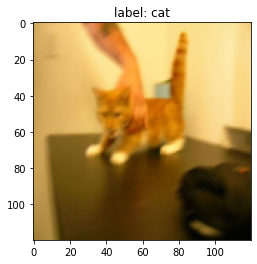

In [17]:
tf = torchvision.transforms.ToPILImage()
img, label = trainSet[0]
img = tf(img)
plt.imshow(img)
plt.title(f'label: {labels[label]}')
plt.show()

In [18]:
batch_size = 256
learning_rate = 0.001

### Load Data

In [19]:
torch.manual_seed(25)

In [20]:
train_loader = torch.utils.data.DataLoader(
              trainSet,
              batch_size = batch_size,
              shuffle = True,
              drop_last=False # residual data take/drop
)

In [21]:
test_loader = torch.utils.data.DataLoader(
    testSet, 
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [22]:
print(len(train_loader))

79


### Model

In [23]:
class Net(nn.Module):
      def __init__(self):
          super().__init__()
          self.linear1 = nn.Linear(3*120*120, 512)
          self.linear2 = nn.Linear(512, 256)
          self.linear3 = nn.Linear(256, 2)

      def forward(self, x):
          x = F.relu(self.linear1(x))
          x = F.relu(self.linear2(x))
          x = self.linear3(x)
          return x 

In [24]:
model = Net().to(device)
model

Net(
  (linear1): Linear(in_features=43200, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=2, bias=True)
)

### Loss function and optimizer

In [25]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training and test methods

In [26]:
def train_loop(model, criterion, optimizer):
    accuracy = 0
    cost = 0
    for X, Y in train_loader: 
        X, Y = X.to(device), Y.to(device)
        X = X.view(-1, 3*120*120)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, Y)
        loss.backward()
        optimizer.step()  # params = params - lr * params.grad
        cost += loss
        accuracy += ((pred.argmax(dim=1)  == Y).sum().item()) / len(Y)
    return cost / len(train_loader), accuracy / len(train_loader) #epoch 평균
    
def test_loop(model, criterion):
    accuracy = 0
    with torch.no_grad():
        for (X, Y) in test_loader:
            X, Y = X.to(device), Y.to(device)
            X = X.view(-1, 3*120*120)
            output = model(X)
            preds = torch.argmax(output, 1)
            correct = (preds == Y)
            accuracy += correct.sum().item()
    return accuracy / len(testSet)

### Training

In [27]:
import time
losses = []
accuracies = []
for epoch in range(15):   #epochs
    t = time.time()
    cost, accuracy = train_loop(model, criterion, optimizer)
    t = time.time() - t
    print(f'Epoch {epoch} ===================={t}====')
    print(f'loss: {cost:.4}\t\taccuracy: {accuracy:.4}')
    losses.append(cost)
    accuracies.append(accuracy)

Epoch 0 ====================70.31245160102844====
loss: 1.152		accuracy: 0.5403
Epoch 1 ====================65.75913834571838====
loss: 0.6861		accuracy: 0.5739
Epoch 2 ====================65.59448432922363====
loss: 0.6618		accuracy: 0.6043
Epoch 3 ====================65.81775856018066====
loss: 0.6595		accuracy: 0.6077
Epoch 4 ====================65.71146726608276====
loss: 0.6456		accuracy: 0.6247
Epoch 5 ====================65.79694080352783====
loss: 0.6368		accuracy: 0.6374
Epoch 6 ====================66.03762292861938====
loss: 0.6479		accuracy: 0.6244
Epoch 7 ====================66.18137073516846====
loss: 0.6468		accuracy: 0.6233
Epoch 8 ====================66.31626224517822====
loss: 0.632		accuracy: 0.6406
Epoch 9 ====================66.30438613891602====
loss: 0.6284		accuracy: 0.6436
Epoch 10 ====================66.33720231056213====
loss: 0.6179		accuracy: 0.6556
Epoch 11 ====================66.32218551635742====
loss: 0.6178		accuracy: 0.6559
Epoch 12 ===================

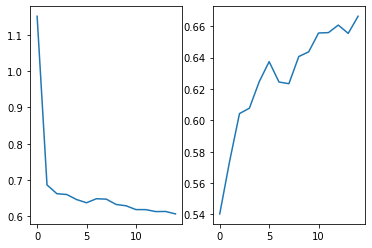

In [28]:
plt.subplot(1,2,1)
plt.plot(range(len(losses)), torch.Tensor(losses))
plt.subplot(1,2,2)
plt.plot(range(len(losses)), torch.Tensor(accuracies))
plt.show()

### Test

In [29]:
accuracy = test_loop(model, criterion)
print(f'accuracy: {accuracy}')

accuracy: 0.647


### Test visually

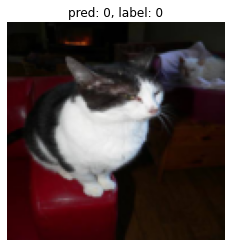

In [30]:
tf = torchvision.transforms.ToPILImage()
img, label = testSet[903] # (img, label)
# Predict
input = img.view(-1, 3*120*120).to(device)
output = model(input)
preds = torch.argmax(output, 1)

# Image out
img = tf(img)
plt.axis('off')
plt.imshow(img)
plt.title(f'pred: {preds.item()}, label: {label}')
plt.show()

**   ** 

## CNN
  - Output Size = (input - kernel_size + 2*padding_size) / stride + 1

In [31]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)   
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)  
    self.maxPool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.linear1 = nn.Linear(30*30*32, 512)  #input, output
    self.linear2 = nn.Linear(512, 2)  #input, output
    
  def forward(self, x):
    # CONV1 + RELU + POOLING
    x = F.relu(self.conv1(x))     #(120,120,3) -> (120,120,16)
    x = self.maxPool(x)   #(120,120,16) -> (60, 60, 16)
    # CONV2 + RELU + POOLING
    x = F.relu(self.conv2(x))     #(60,60,16) -> (60,60,32)
    x = self.maxPool(x)   #(60,60,32) -> (30, 30, 32)
    x = x.view(-1, 30*30*32)
    x = F.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [32]:
model = Net().to(device)
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=28800, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=2, bias=True)
)

In [33]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training

In [34]:
def train_loop(model, criterion, optimizer):
    accuracy = 0
    cost = 0
    for X, Y in train_loader: 
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()   
        pred = model(X)
        loss = criterion(pred, Y)  
        loss.backward()
        optimizer.step()        
        cost += loss
        accuracy += ((pred.argmax(dim=1)  == Y).sum().item()) / len(Y)

    return cost / len(train_loader), accuracy / len(train_loader)
    
def test_loop(model, criterion):
    accuracy = 0
    with torch.no_grad():
        for (X, Y) in test_loader:
            X, Y = X.to(device), Y.to(device)
            output = model(X)
            preds = torch.argmax(output, 1)  
            correct = (preds == Y)
            accuracy += correct.sum().item()
    return accuracy / len(testSet)

In [35]:
import time
losses = []
accuracies = []
for epoch in range(20): 
    t = time.time()
    cost, accuracy = train_loop(model, criterion, optimizer)
    t = time.time() - t
    print(f'Epoch {epoch} ===================={t}====')
    print(f'loss: {cost:.4}\t\taccuracy: {accuracy:.4}')
    losses.append(cost)
    accuracies.append(accuracy)

Epoch 0 ====================71.99144864082336====
loss: 0.7229		accuracy: 0.5446
Epoch 1 ====================67.5954122543335====
loss: 0.6119		accuracy: 0.668
Epoch 2 ====================67.76865315437317====
loss: 0.554		accuracy: 0.7156
Epoch 3 ====================67.98757123947144====
loss: 0.5081		accuracy: 0.7491
Epoch 4 ====================68.18020367622375====
loss: 0.4686		accuracy: 0.7773
Epoch 5 ====================68.11729097366333====
loss: 0.4294		accuracy: 0.7994
Epoch 6 ====================68.55671381950378====
loss: 0.3921		accuracy: 0.8224
Epoch 7 ====================68.57696747779846====
loss: 0.3575		accuracy: 0.842
Epoch 8 ====================68.34382820129395====
loss: 0.3308		accuracy: 0.8539
Epoch 9 ====================68.53694272041321====
loss: 0.2785		accuracy: 0.8844
Epoch 10 ====================68.55425786972046====
loss: 0.2336		accuracy: 0.9079
Epoch 11 ====================68.83745193481445====
loss: 0.2125		accuracy: 0.9147
Epoch 12 ====================6

### Test

In [36]:
accuracy = test_loop(model, criterion)
print(f'accuracy: {accuracy}')

accuracy: 0.7666
